<a href="https://colab.research.google.com/github/pejmanrasti/From_Shallow_to_Deep/blob/main/2_2_Hyperparameters_tuning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Overview

The Keras Tuner is a library that helps you pick the optimal set of hyperparameters for your TensorFlow program. The process of selecting the right set of hyperparameters for your machine learning (ML) application is called *hyperparameter tuning* or *hypertuning*.

Hyperparameters are the variables that govern the training process and the topology of an ML model. These variables remain constant over the training process and directly impact the performance of your ML program. Hyperparameters are of two types:
1. **Model hyperparameters** which influence model selection such as the number and width of hidden layers
2. **Algorithm hyperparameters** which influence the speed and quality of the learning algorithm such as the learning rate for Stochastic Gradient Descent (SGD) and the number of nearest neighbors for a k Nearest Neighbors (KNN) classifier

In this tutorial, you will use the Keras Tuner to perform hypertuning for an image classification application.

In [1]:
#Import libraries
import os
import cv2
import random
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.models import Sequential # Model type to be used
from tensorflow.keras.layers import Dense, Activation, Dropout# Make Fully connected (FC) layers
from tensorflow.keras.utils import to_categorical # NumPy related tools
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten

In [2]:
from google.colab import drive
root = '/content/gdrive/'
drive.mount( root )

Mounted at /content/gdrive/


In [3]:
!unzip gdrive/My\ Drive/data_Iran/101_ObjectCategories.zip

Streaming output truncated to the last 5000 lines.
  inflating: 101_ObjectCategories/Motorbikes/image_0736.jpg  
  inflating: __MACOSX/101_ObjectCategories/Motorbikes/._image_0736.jpg  
  inflating: 101_ObjectCategories/Motorbikes/image_0078.jpg  
  inflating: __MACOSX/101_ObjectCategories/Motorbikes/._image_0078.jpg  
  inflating: 101_ObjectCategories/Motorbikes/image_0285.jpg  
  inflating: __MACOSX/101_ObjectCategories/Motorbikes/._image_0285.jpg  
  inflating: 101_ObjectCategories/Motorbikes/image_0291.jpg  
  inflating: __MACOSX/101_ObjectCategories/Motorbikes/._image_0291.jpg  
  inflating: 101_ObjectCategories/Motorbikes/image_0246.jpg  
  inflating: __MACOSX/101_ObjectCategories/Motorbikes/._image_0246.jpg  
  inflating: 101_ObjectCategories/Motorbikes/image_0520.jpg  
  inflating: __MACOSX/101_ObjectCategories/Motorbikes/._image_0520.jpg  
  inflating: 101_ObjectCategories/Motorbikes/image_0534.jpg  
  inflating: __MACOSX/101_ObjectCategories/Motorbikes/._image_0534.jpg  
  in

In [4]:
DATADIR = "101_ObjectCategories"
CATEGORIES = os.listdir(DATADIR)
print(CATEGORIES)

['pigeon', 'scorpion', 'rhino', 'flamingo_head', 'schooner', 'okapi', 'beaver', 'airplanes', 'stop_sign', 'laptop', 'ant', 'dragonfly', 'brain', 'sunflower', 'Motorbikes', 'bass', 'rooster', 'butterfly', 'hawksbill', 'garfield', 'pagoda', 'ketch', 'nautilus', 'pizza', 'flamingo', 'camera', 'headphone', 'llama', 'wild_cat', 'octopus', 'wrench', 'lobster', 'soccer_ball', 'electric_guitar', 'inline_skate', 'cannon', 'crocodile', 'windsor_chair', 'trilobite', 'hedgehog', 'crab', 'mayfly', 'ibis', 'tick', 'lamp', 'crocodile_head', 'pyramid', 'joshua_tree', 'crayfish', 'cougar_body', 'saxophone', 'platypus', 'dollar_bill', 'binocular', 'dalmatian', 'emu', 'menorah', 'helicopter', 'dolphin', 'wheelchair', 'minaret', 'Faces_easy', 'mandolin', 'cougar_face', 'metronome', 'strawberry', 'stegosaurus', 'euphonium', 'elephant', 'BACKGROUND_Google', 'revolver', 'sea_horse', 'chandelier', 'Leopards', 'car_side', 'gerenuk', 'buddha', 'snoopy', 'ewer', 'chair', 'ceiling_fan', 'yin_yang', 'lotus', 'bron

In [5]:
CATEGORIES = ['BACKGROUND_Google', 'Motorbikes', 'airplanes', 'Faces_easy', 'Faces']
print(CATEGORIES)

['BACKGROUND_Google', 'Motorbikes', 'airplanes', 'Faces_easy', 'Faces']


In [6]:
training_data = []
IMG_SIZE_H=224 # you need to set up a numerical value here. Useful to resize to normalize data size
IMG_SIZE_W=224 # you need to set up a numerical value here. Useful to resize to normalize data size
def create_training_data():
    for category in CATEGORIES:  # do plants and weeds

        path = os.path.join(DATADIR,category)  # create path to the labels
        class_num = CATEGORIES.index(category)  # get the classification  (0 or a 1). 0=plants 1=weeds

        for img in os.listdir(path):  # iterate over each image per plants and weeds
          if img.endswith('.jpg'):
            img_array = cv2.imread(os.path.join(path,img))  # convert to array 
            new_array = cv2.resize(img_array, (IMG_SIZE_H, IMG_SIZE_W))  # resize to normalize data size
            training_data.append([new_array, class_num])  # add this to our training_data


In [7]:
create_training_data()  # Calling the function for reading images and labels
print(len(training_data)) # Printing the size of the database

2935


Preparation of data for importing to Keras

In [8]:
random.shuffle(training_data)
X = []  # An Array for images
y = []  # An Array for labels

for features,label in training_data:   # Seperation of iamegs and labels
    X.append(features)
    y.append(label)
print(np.array(X).shape) # Print the size of the database

(2935, 224, 224, 3)


In [9]:
X = np.array(X).reshape(-1, IMG_SIZE_H, IMG_SIZE_W, 3)  # Reshape data in a form that is suitable for keras
print(X.shape) # Print the size of the database

(2935, 224, 224, 3)


In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [11]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow

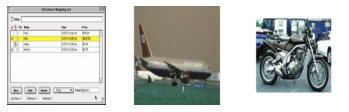

In [12]:
# Display 3 images 
plt.subplot(131)
plt.imshow(X[0,:,:,:])
plt.axis("off")
plt.subplot(132)
plt.imshow(X[10,:,:,:])
plt.axis("off")
plt.subplot(133)
plt.imshow(X[1000,:,:,:]) 
plt.axis("off")
# show the plot
plt.show()

In [13]:
# normalize data
X_train = X_train.astype('float32') / 255.
X_test = X_test.astype('float32') / 255.
# one hot encode outputs
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [14]:
def build_model(hp):
    # create model object
    model = keras.Sequential([
    #adding first convolutional layer    
    Conv2D(
        #adding filter 
        filters=hp.Int('conv_1_filter', min_value=32, max_value=64, step=16),
        # adding filter size or kernel size
        kernel_size=hp.Choice('conv_1_kernel', values = [3,5]),
        #activation function
        activation='relu',
        input_shape=(224,224,3)),
    MaxPooling2D(pool_size=(2, 2)),
    # adding second convolutional layer 
    Conv2D(
        #adding filter 
        filters=hp.Int('conv_2_filter', min_value=64, max_value=128, step=16),
        #adding filter size or kernel size
        kernel_size=hp.Choice('conv_2_kernel', values = [3,5]),
        #activation function
        activation='relu'
    ),
    MaxPooling2D(pool_size=(2, 2)),

    # adding second convolutional layer 
    Conv2D(
        #adding filter 
        filters=hp.Int('conv_2_filter', min_value=64, max_value=128, step=16),
        #adding filter size or kernel size
        kernel_size=hp.Choice('conv_2_kernel', values = [3,5]),
        #activation function
        activation='relu'
    ),
    MaxPooling2D(pool_size=(2, 2)),

    # adding second convolutional layer 
    Conv2D(
        #adding filter 
        filters=hp.Int('conv_2_filter', min_value=64, max_value=128, step=16),
        #adding filter size or kernel size
        kernel_size=hp.Choice('conv_2_kernel', values = [3,5]),
        #activation function
        activation='relu'
    ),
    MaxPooling2D(pool_size=(2, 2)),

    # adding flatten layer    
    keras.layers.Flatten(),
    # adding dense layer    
    keras.layers.Dense(
        units=hp.Int('dense_1_units', min_value=32, max_value=128, step=16),
        activation='relu'
    ),
    # output layer    
    keras.layers.Dense(5, activation='softmax')
    ])
    #compilation of model
    model.compile(optimizer=keras.optimizers.Adam(hp.Choice('learning_rate', values=[1e-2, 1e-3])),
              loss='categorical_crossentropy',
              metrics=['accuracy'])
    return model

In [15]:
!pip install -q -U keras-tuner

     |████████████████████████████████| 98 kB 3.6 MB/s 


In [16]:
#importing random search
import keras_tuner as kt
#from keras-tuner import RandomSearch
#creating randomsearch object
tuner = kt.RandomSearch(build_model,
                    objective='val_accuracy',
                    max_trials = 5)
# search best parameter
tuner.search(X_train,y_train,epochs=3,validation_data=(X_test,y_test))

Trial 5 Complete [00h 01m 23s]
val_accuracy: 0.2860386073589325

Best val_accuracy So Far: 0.9194097518920898
Total elapsed time: 00h 06m 09s
INFO:tensorflow:Oracle triggered exit


In [17]:
model=tuner.get_best_models(num_models=1)[0]
#summary of best model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 220, 220, 32)      2432      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 108, 108, 80)      23120     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 80)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 80)        57680     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 26, 26, 80)       0

In [18]:
! pip install livelossplot
from livelossplot import PlotLossesKeras
plotlosses = PlotLossesKeras()

In [19]:
early_stop = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', patience=10, verbose=1, mode='auto') #Stop training when a monitored metric has stopped improving.

checkpoint_filepath = 'checkpointCNN.h5'
Model_check = tf.keras.callbacks.ModelCheckpoint(
    checkpoint_filepath, monitor='val_loss', verbose=1, save_best_only=True, mode='auto') #Callback to save the Keras model or model weights at some frequency.

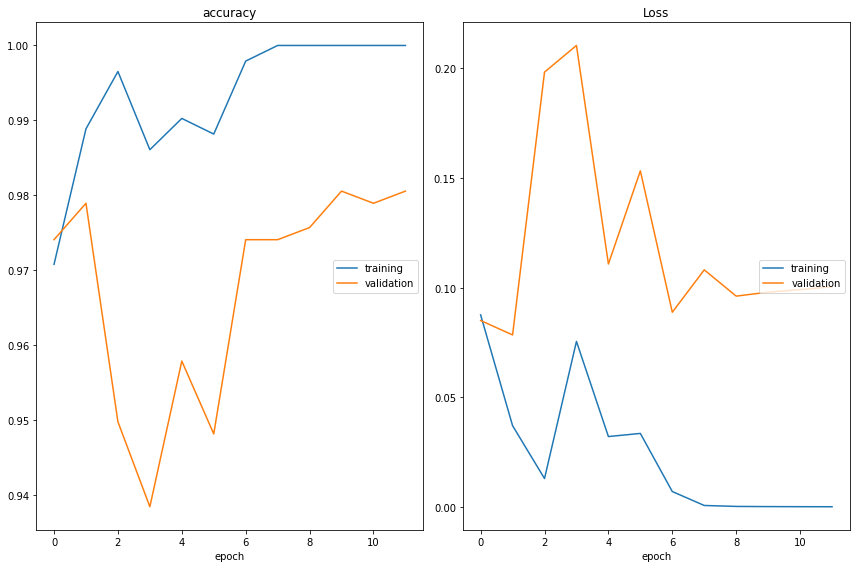

accuracy
	training         	 (min:    0.971, max:    1.000, cur:    1.000)
	validation       	 (min:    0.938, max:    0.981, cur:    0.981)
Loss
	training         	 (min:    0.000, max:    0.088, cur:    0.000)
	validation       	 (min:    0.078, max:    0.211, cur:    0.100)

Epoch 12: val_loss did not improve from 0.07846
45/45 [==============================] - 7s 158ms/step - loss: 8.2779e-05 - accuracy: 1.0000 - val_loss: 0.1004 - val_accuracy: 0.9806
Epoch 12: early stopping


In [20]:
model.fit(X_train, y_train, 
          validation_split=0.3,
          epochs=50, batch_size=32,
          verbose=1,
          callbacks=[plotlosses,early_stop, Model_check])

In [21]:
model_New_load = tf.keras.models.load_model('checkpointCNN.h5')
loss, accuracy = model_New_load.evaluate(X_test, y_test, verbose=0) #Evaluation of the model on the test dataset
print('Test loss:', loss)
print('Test accuracy:', accuracy)

Test loss: 0.21717216074466705
Test accuracy: 0.9421112537384033
